The goal of this analysis is to understand the key factors influencing salary variations in the job market across different experience levels, employment types, company sizes, and locations. By exploring salary trends, remote work impact, and company-level factors, we aim to provide insights into:

How salary differs based on experience level and employment type (full-time, contract, freelance).
The effect of remote work and company location on salary distribution.
Which job titles offer the highest and lowest salaries.
How company size (small, medium, large) impacts salary trends.
Salary differences across employee residence vs. company location (e.g., do remote workers earn more?).
The findings will help job seekers, HR professionals, and businesses make data-driven decisions regarding compensation strategies and hiring trends

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df= pd.read_csv('ds_salaries.csv')

In [64]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [65]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [67]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [68]:
df.duplicated().sum()

np.int64(1171)

In [69]:
df=df.drop_duplicates()

In [70]:
df.duplicated().sum()

np.int64(0)

In [71]:
df.shape

(2584, 11)

In [72]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


**outliers**

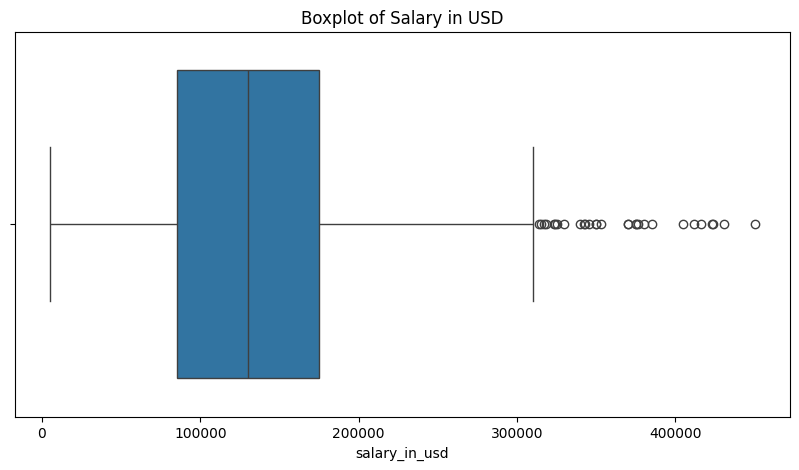

In [73]:
# Boxplot for salary distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['salary_in_usd'])
plt.title("Boxplot of Salary in USD")
plt.show()


In [74]:
df=df[df['salary_in_usd']<df['salary_in_usd'].quantile(0.99)]

In [75]:
df.shape

(2558, 11)

we can see that before removing outlier the rows are 2584 and after removing it is 2558

**Exploratory Data Analysis**

Salary Distribution

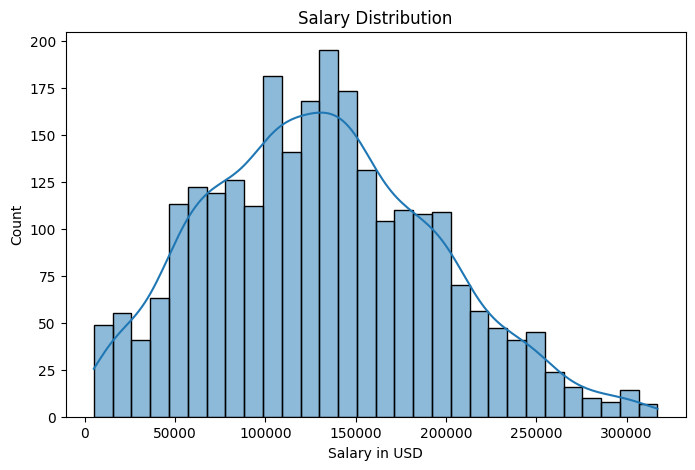

In [76]:
plt.figure(figsize=(8,5))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary in USD")
plt.ylabel("Count")
plt.show()

Most people earn lower salaries: The tallest bars are on the left side of the graph, which represents the lower salary range. This means a larger number of people fall into this category.
Fewer people earn high salaries: As you move to the right side of the graph, the bars become shorter. This indicates that there are fewer people earning higher salaries.

Experience Level vs. Salary

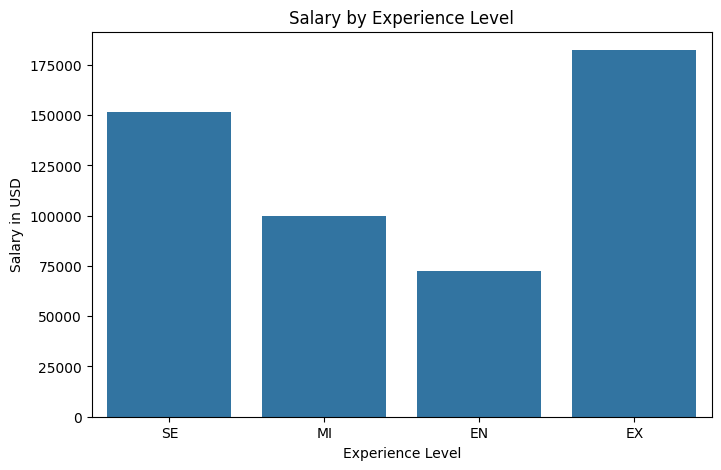

In [77]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['experience_level'], y=df['salary_in_usd'],errorbar=None)
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.show()

The graph shows the average salary for different experience levels (SE, MI, EN, EX).  "EX" (Executive/Expert) has the highest average salary, while "EN" (Entry-level) has the lowest.

Employment Type vs. Salary

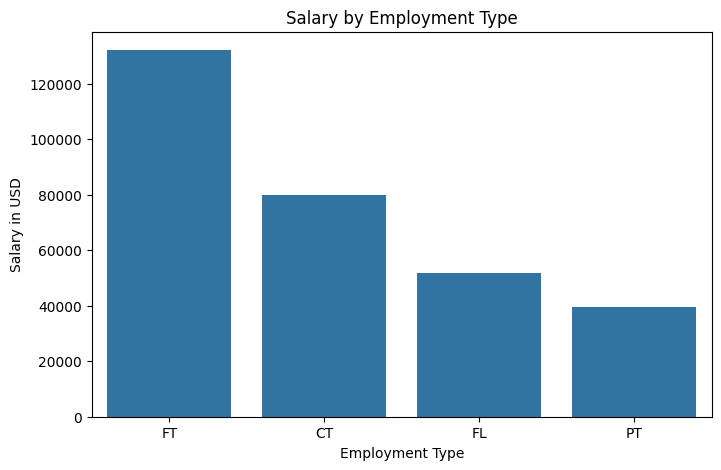

In [78]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['employment_type'], y=df['salary_in_usd'],errorbar=None)
plt.title("Salary by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Salary in USD")
plt.show()

The graph shows the average salary for different employment types (FT, CT, FL, PT). "FT" (Full-Time) has the highest average salary, while "PT" (Part-Time) has the lowest.

Job Title vs. Salary

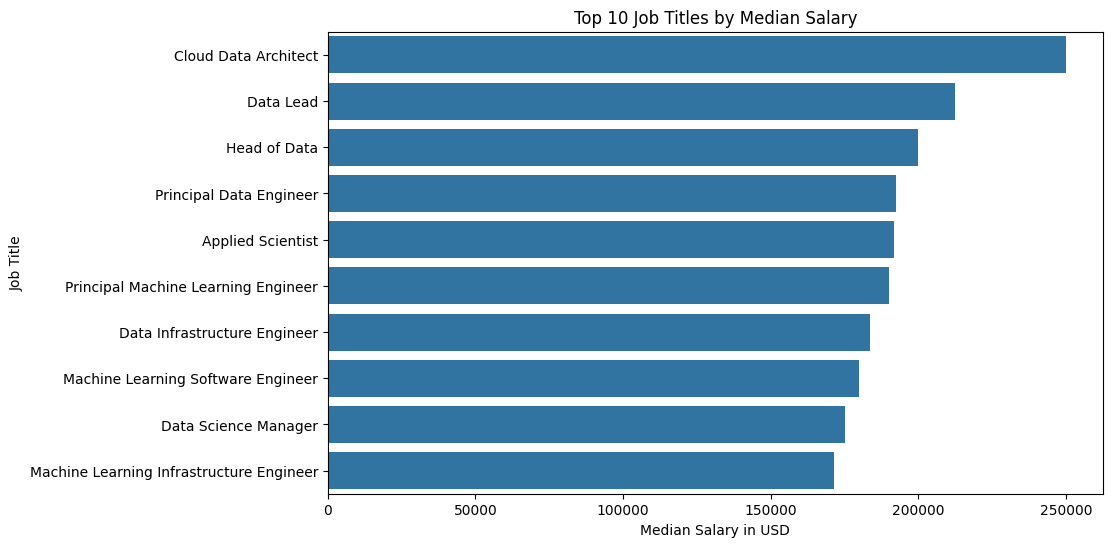

In [79]:
top_jobs = df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.title("Top 10 Job Titles by Median Salary")
plt.xlabel("Median Salary in USD")
plt.ylabel("Job Title")
plt.show()

The graph shows the median salaries for the top 10 highest-paying job titles. "Cloud Data Architect" has the highest median salary, while "Machine Learning Infrastructure Engineer" has the lowest among the top 10.

Remote Work Impact on Salary

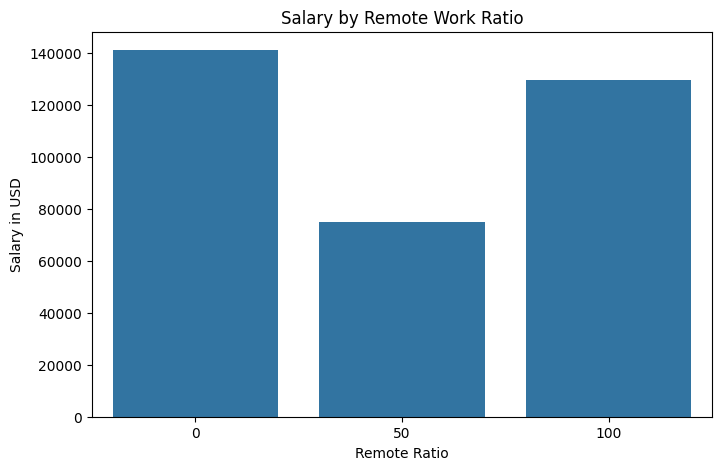

In [80]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['remote_ratio'], y=df['salary_in_usd'],errorbar=None)
plt.title("Salary by Remote Work Ratio")
plt.xlabel("Remote Ratio")
plt.ylabel("Salary in USD")
plt.show()

The graph shows the average salary for different remote work ratios (0, 50, 100).  A 0% remote work ratio (fully in-office) and a 100% remote work ratio have higher average salaries than a 50% remote work ratio (hybrid).

Company Size vs. Salary

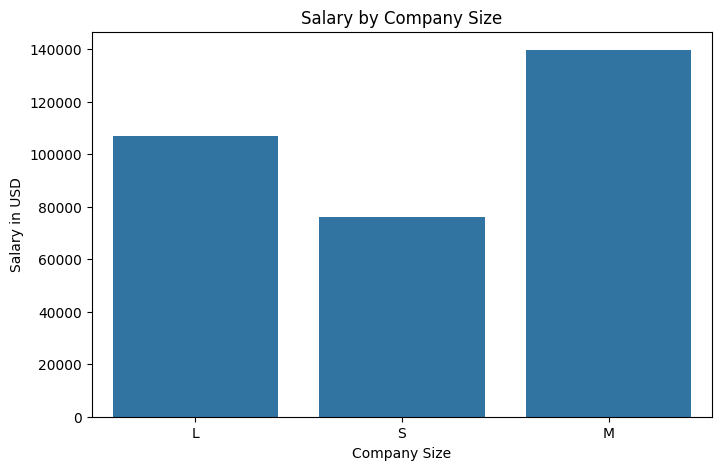

In [81]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['company_size'], y=df['salary_in_usd'],errorbar=None)
plt.title("Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Salary in USD")
plt.show()

The graph shows the average salary for different company sizes (L, S, M).  Medium-sized companies (M) have the highest average salary, while small-sized companies (S) have the lowest.

Company Location vs. Salary

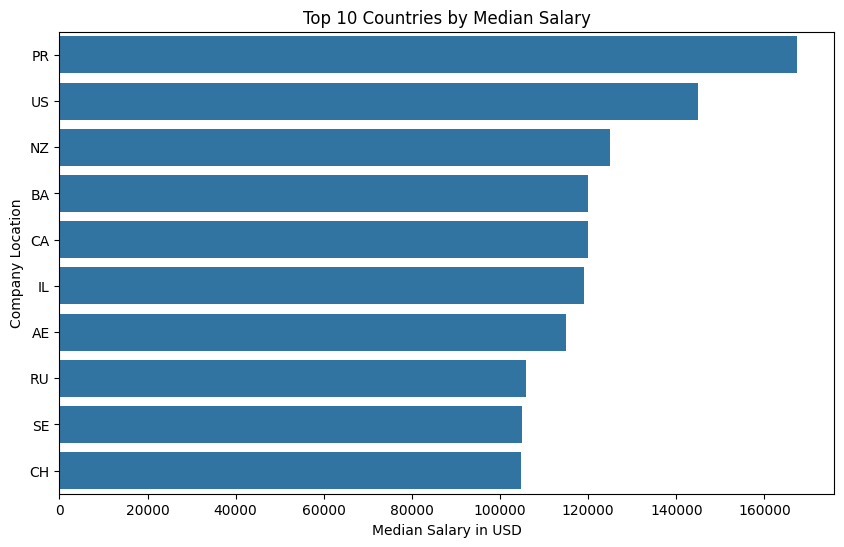

In [82]:
top_countries = df.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Median Salary")
plt.xlabel("Median Salary in USD")
plt.ylabel("Company Location")
plt.show()

The graph shows the median salaries for the top 10 countries.  "PR"  has the highest median salary, while "CH"  has the lowest among the top 10.

Correlation Matrix

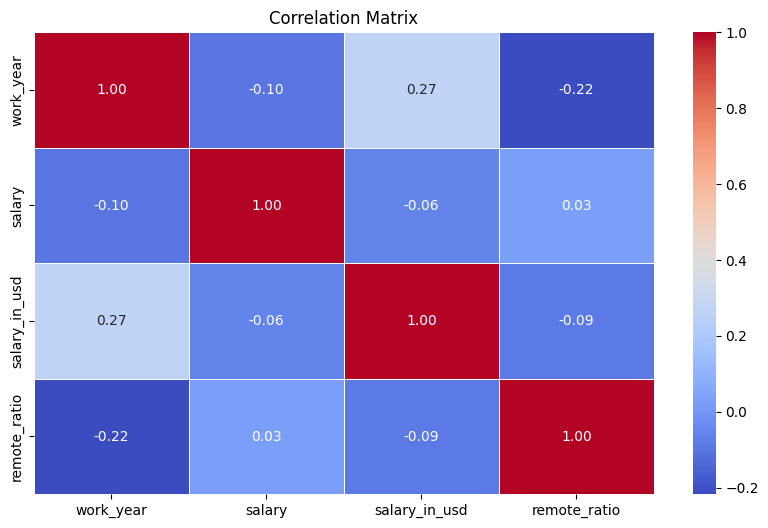

In [83]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


**coclusion**

Overall, experience level, job title, and company size are the main factors influencing salary. Executive roles and specialized positions offer the highest pay, while full-time jobs generally pay more than contract or freelance work. Medium-sized companies tend to offer better salaries, and salaries vary significantly across locations. The impact of remote work on salary is unclear, with both fully remote and in-office roles showing slightly higher pay than hybrid setups.

**preprocessing**

for ordinal data

In [84]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform data
encoded_data = encoder.fit_transform(df[['experience_level','company_size']])

# Create a DataFrame for the encoded data
df2 = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['experience_level','company_size']))

# Concatenate original and encoded data
result = pd.concat([df, df2], axis=1)

result

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,company_size_L,company_size_M,company_size_S
0,2023.0,SE,FT,Principal Data Scientist,80000.0,EUR,85847.0,ES,100.0,ES,L,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2023.0,MI,CT,ML Engineer,30000.0,USD,30000.0,US,100.0,US,S,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2023.0,MI,CT,ML Engineer,25500.0,USD,25500.0,US,100.0,US,S,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2023.0,SE,FT,Data Scientist,175000.0,USD,175000.0,CA,100.0,CA,M,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2023.0,SE,FT,Data Scientist,120000.0,USD,120000.0,CA,100.0,CA,M,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0


for nominal data

In [85]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding separately to each column
df['employment_type_LabelEncoded'] = label_encoder.fit_transform(df['employment_type'])
df['job_title_LabelEncoded'] = label_encoder.fit_transform(df['job_title'])
df['company_location_LabelEncoded'] = label_encoder.fit_transform(df['company_location'])
df['employee_residence_LabelEncoded'] = label_encoder.fit_transform(df['employee_residence'])

(df.head())  # Display first few rows


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employment_type_LabelEncoded,job_title_LabelEncoded,company_location_LabelEncoded,employee_residence_LabelEncoded
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,2,83,25,26
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,0,65,70,74
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,0,65,70,74
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,2,46,12,11
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,2,46,12,11


In [86]:
result = pd.get_dummies(df,dtype=int,drop_first=True)
result

,work_year,salary,salary_in_usd,remote_ratio,employment_type_LabelEncoded,job_title_LabelEncoded,company_location_LabelEncoded,employee_residence_LabelEncoded,experience_level_EX,experience_level_MI,...,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,2023,80000,85847,100,2,83,25,26,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2023,30000,30000,100,0,65,70,74,0,1,...,0,0,0,0,0,0,1,0,0,1
2,2023,25500,25500,100,0,65,70,74,0,1,...,0,0,0,0,0,0,1,0,0,1
3,2023,175000,175000,100,2,46,12,11,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2023,120000,120000,100,2,46,12,11,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3749,2021,165000,165000,100,2,48,70,74,0,0,...,0,0,0,0,0,0,1,0,0,0
3751,2021,151000,151000,100,2,83,70,74,0,1,...,0,0,0,0,0,0,1,0,0,0
3752,2020,105000,105000,100,2,46,70,74,0,0,...,0,0,0,0,0,0,1,0,0,1
3753,2020,100000,100000,100,0,17,70,74,0,0,...,0,0,0,0,0,0,1,0,0,0


In [87]:
X =result.drop('salary_in_usd',axis=1)  # Independent variables
Y = result['salary_in_usd']  # Target variable

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

In [89]:
x_train, x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [90]:
print('Shape of X_train is -' , x_train.shape)
print('Shape of X_train is -' , x_train.shape)
print('Shape of y_train is -' , y_train.shape)
print ('Shape of y_train is -' , y_train.shape)

Shape of X_train is - (2046, 271)
Shape of X_train is - (2046, 271)
Shape of y_train is - (2046,)
Shape of y_train is - (2046,)


In [91]:
reg = LinearRegression()

In [92]:
reg.fit(x_train, y_train)

LinearRegression()

In [93]:
reg.predict(x_test)

array([  59629.20771863,  121122.54302352,  125283.74249519,
        116715.78708994,   80822.02489248,  163617.36478294,
         58987.98933196,  167755.52227435,  188968.5877184 ,
         89404.96972574,  153402.61118058,  177250.32130314,
        136485.53697717,   41718.23858887,   75533.78553421,
        171822.38064624,  183164.87539552,  158158.25908224,
        156903.61571629,  140924.25418268,  171284.14081076,
        166695.19318528,  164038.06639935,   97655.79285192,
        162851.3158797 ,  171685.1798817 ,  183219.84040646,
        116258.78110311,  189259.15253437,   99641.61858682,
        139613.57270149,  169585.91546718,  162454.43120016,
        157011.60837679,  125947.54650596,  186001.13432433,
        160712.95659673,   67222.95164129,  128796.03110665,
        107409.69887635,  155589.98000189,  158188.31364802,
        108499.41941216,  153365.29198415,  181763.86923907,
        155902.99734151,  162353.04198009,  158247.10678783,
        128487.22231689,

In [94]:
r2_score(y_test,reg.predict(x_test))

0.41757254750447426